In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how = "left", on = ["city"])


# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

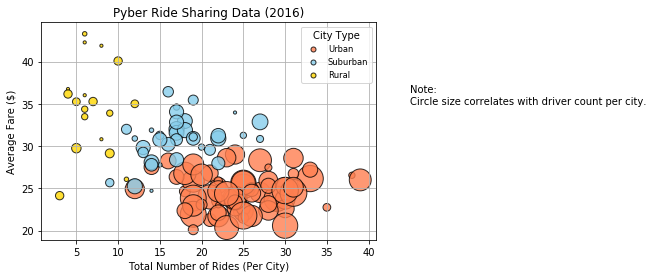

In [2]:
# Obtain the x and y coordinates for each of the three city types
rural = city_ride_data[city_ride_data["type"] == "Rural"]
suburban= city_ride_data[city_ride_data["type"] == "Suburban"]
urban= city_ride_data[city_ride_data["type"] == "Urban"]

urban_count = urban.groupby(["city"]).count()["ride_id"]
suburban_count = suburban.groupby(["city"]).count()["ride_id"]
rural_count = rural.groupby(["city"]).count()["ride_id"]

urban_avg_fare = urban.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]

urban_driver_avg = urban.groupby(["city"]).mean()["driver_count"]
suburban_driver_avg = suburban.groupby(["city"]).mean()["driver_count"]
rural_driver_avg = rural.groupby(["city"]).mean()["driver_count"]


# Build the scatter plots for each city types
UrbanPlot = plt.scatter(urban_count, urban_avg_fare,
            s = 10*urban_driver_avg,
            c = "coral", 
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = .8, label = "Urban")

SuburbanPlot = plt.scatter(suburban_count, suburban_avg_fare, 
            s = 10*suburban_driver_avg,
            c = "skyblue",
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = .8, label = "Suburban")

RuralPlot = plt.scatter(rural_count, rural_avg_fare, 
            s = 10*rural_driver_avg,
            c = "gold", 
            edgecolor = "black", linewidths = 1, marker = "o", 
            alpha = .8, label = "Rural")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Create a legend
lgnd = plt.legend(handles = [UrbanPlot, SuburbanPlot, RuralPlot], loc = "upper right", 
                  title = "City Type", fontsize = "small")
for handle in lgnd.legendHandles:
    handle.set_sizes([25.0])
    
    
# Incorporate a text label regarding circle size
plt.text(45, 35, "Note:\nCircle size correlates with driver count per city.")


# Save Figure
plt.savefig("PyberBubblePlot.jpg", bbox_inches = "tight")


# Show plot
plt.show()

## Total Fares by City Type

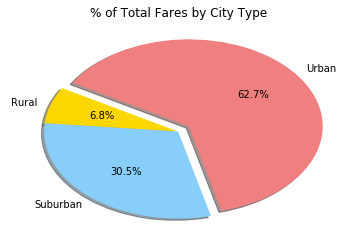

In [3]:
# Calculate Type Percents
fares_pie = 100 * city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum()


# Build Pie Chart
plt.pie(fares_pie,
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
        explode = [0, 0, 0.1],
        autopct = '%1.1f%%',
        shadow = True, startangle = 150)

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("PyberFaresPieChart.jpg")


# Show Figure
plt.show()

## Total Rides by City Type

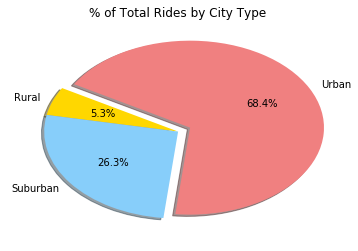

In [4]:
# Calculate Ride Percents
ride_pie = 100 * city_ride_data.groupby(["type"]).count()["ride_id"] / city_ride_data["ride_id"].count()


# Build Pie Chart
plt.pie(ride_pie, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1], 
        autopct = '%1.1f%%', 
        shadow = True, startangle = 150)

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("PyberRidesPieChart.jpg")


# Show Figure
plt.show()

## Total Drivers by City Type

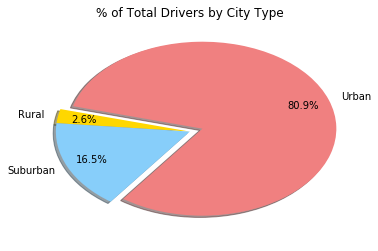

In [5]:
# Calculate Driver Percents
drivers_pie = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()


# Build Pie Charts
plt.pie(drivers_pie, 
        labels = ["Rural", "Suburban", "Urban"], 
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = [0, 0, 0.1], 
        autopct = '%1.1f%%', 
        pctdistance = 0.8,
        shadow = True, startangle = 165)

plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("PyberDriversPieChart.jpg")


# Show Figure
plt.show()